# Importing the  Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor

In [2]:
train_data = pd.read_csv(r"C:\Users\kd67152\Desktop\Datasets\train.csv") 
train_data.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452


In [3]:
train_data.shape

(30471, 292)

In [4]:
train_data["timestamp"] = train_data["timestamp"].apply(lambda x: x[:4]).astype("float64")
train_data.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011.0,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011.0,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011.0,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011.0,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011.0,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452


In [5]:
train_data["build_year"].dtype

dtype('float64')

# Feature Engineering

In [6]:
train_data["build_age"] = train_data["timestamp"] - train_data["build_year"]
train_data["build_age"]

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
30466    40.0
30467    80.0
30468     NaN
30469    12.0
30470    47.0
Name: build_age, Length: 30471, dtype: float64

# Selected columns

In [7]:
columns = ["oil_chemistry_km","cafe_count_500_price_1500","market_count_1500","office_km","university_km","indust_part","leisure_count_500","fitness_km","public_healthcare_km","water_km","power_transmission_line_km","cemetery_km","kindergarten_km","healthcare_centers_raion","full_all","full_sq","incineration_km","green_zone_km","trc_count_1000","big_market_km"]
len(columns)

20

# Create a dataFrame with selected columns

In [8]:
dataFrame = pd.DataFrame(train_data[columns])
dataFrame["price_doc"] = train_data["price_doc"]
dataFrame.head()

,oil_chemistry_km,cafe_count_500_price_1500,market_count_1500,office_km,university_km,indust_part,leisure_count_500,fitness_km,public_healthcare_km,water_km,...,cemetery_km,kindergarten_km,healthcare_centers_raion,full_all,full_sq,incineration_km,green_zone_km,trc_count_1000,big_market_km,price_doc
0,18.152338,0,1,0.637189,6.715026,0.000070,0,0.485841,0.974743,0.992631,...,1.804127,0.145700,1,86206,43,3.633334,0.600973,3,10.814172,5850000
1,9.034642,0,0,0.688796,1.852560,0.049637,0,0.668364,1.477723,0.698081,...,4.655004,0.147754,1,76284,34,8.648587,0.065321,5,6.910568,6000000
2,5.777394,1,5,1.543049,0.841254,0.118537,0,0.733101,0.097144,0.468265,...,3.381083,0.049102,1,101982,43,11.996480,0.453172,0,5.752368,5700000
3,27.667863,2,2,0.934273,10.903161,0.069753,0,0.623484,2.163735,1.200336,...,2.017080,0.179441,1,21155,89,14.317640,0.106125,6,27.892717,13100000
4,6.515857,11,2,0.077901,0.991683,0.037316,2,0.220288,1.121703,0.820294,...,2.936581,0.247901,4,28179,77,11.903910,0.236214,3,9.155057,16331452


In [9]:
dataFrame.shape

(30471, 21)

# Descriptive Statistics

In [10]:
dataFrame.describe()

,oil_chemistry_km,cafe_count_500_price_1500,market_count_1500,office_km,university_km,indust_part,leisure_count_500,fitness_km,public_healthcare_km,water_km,...,cemetery_km,kindergarten_km,healthcare_centers_raion,full_all,full_sq,incineration_km,green_zone_km,trc_count_1000,big_market_km,price_doc
count,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,...,30471.000000,30471.000000,30471.000000,3.047100e+04,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,3.047100e+04
mean,17.401611,0.843786,0.766663,2.010973,6.855891,0.118871,0.070592,1.154586,3.356771,0.690947,...,2.314765,0.981684,1.320895,1.463062e+05,54.214269,10.884613,0.300511,1.978176,13.283916,7.123035e+06
std,10.399510,2.318533,1.120489,2.306446,6.731484,0.118688,0.386393,1.541425,4.341804,0.434919,...,1.451071,2.121956,1.492903,2.830251e+05,38.031487,6.789709,0.298402,3.246328,8.497170,4.780111e+06
min,0.510710,0.000000,0.000000,0.000000,0.000313,0.000000,0.000000,0.000000,0.000000,0.006707,...,0.000000,0.000470,0.000000,2.546000e+03,0.000000,0.198071,0.000000,0.000000,0.661366,1.000000e+05
25%,8.720666,0.000000,0.000000,0.555231,2.201193,0.019509,0.000000,0.361170,1.279126,0.339637,...,1.334801,0.199946,0.000000,2.817900e+04,38.000000,6.221938,0.100951,0.000000,7.529625,4.740002e+06
50%,16.698447,0.000000,0.000000,1.052999,4.337579,0.072158,0.000000,0.656267,2.341579,0.621221,...,1.968520,0.353762,1.000000,8.521900e+04,49.000000,10.324170,0.214336,1.000000,11.910442,6.274411e+06
75%,23.424518,1.000000,1.000000,3.046687,9.380269,0.195781,0.000000,1.333994,3.983903,0.963865,...,3.089480,0.971417,2.000000,1.251110e+05,63.000000,13.393815,0.415498,3.000000,16.560167,8.300000e+06
max,70.413434,29.000000,7.000000,18.958933,84.862148,0.521867,9.000000,26.652505,76.055135,2.827709,...,15.778710,29.085774,6.000000,1.716730e+06,5326.000000,58.632050,1.982448,20.000000,59.501648,1.111111e+08


# Display the Complete Meta-Data of the dataset

In [11]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30471 entries, 0 to 30470
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   oil_chemistry_km            30471 non-null  float64
 1   cafe_count_500_price_1500   30471 non-null  int64  
 2   market_count_1500           30471 non-null  int64  
 3   office_km                   30471 non-null  float64
 4   university_km               30471 non-null  float64
 5   indust_part                 30471 non-null  float64
 6   leisure_count_500           30471 non-null  int64  
 7   fitness_km                  30471 non-null  float64
 8   public_healthcare_km        30471 non-null  float64
 9   water_km                    30471 non-null  float64
 10  power_transmission_line_km  30471 non-null  float64
 11  cemetery_km                 30471 non-null  float64
 12  kindergarten_km             30471 non-null  float64
 13  healthcare_centers_raion    304

# Handling Duplicates

In [12]:
dataFrame.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
30466    False
30467    False
30468    False
30469    False
30470    False
Length: 30471, dtype: bool

In [13]:
droped_dataFrame = dataFrame.drop_duplicates()
droped_dataFrame

,oil_chemistry_km,cafe_count_500_price_1500,market_count_1500,office_km,university_km,indust_part,leisure_count_500,fitness_km,public_healthcare_km,water_km,...,cemetery_km,kindergarten_km,healthcare_centers_raion,full_all,full_sq,incineration_km,green_zone_km,trc_count_1000,big_market_km,price_doc
0,18.152338,0,1,0.637189,6.715026,0.000070,0,0.485841,0.974743,0.992631,...,1.804127,0.145700,1,86206,43,3.633334,0.600973,3,10.814172,5850000
1,9.034642,0,0,0.688796,1.852560,0.049637,0,0.668364,1.477723,0.698081,...,4.655004,0.147754,1,76284,34,8.648587,0.065321,5,6.910568,6000000
2,5.777394,1,5,1.543049,0.841254,0.118537,0,0.733101,0.097144,0.468265,...,3.381083,0.049102,1,101982,43,11.996480,0.453172,0,5.752368,5700000
3,27.667863,2,2,0.934273,10.903161,0.069753,0,0.623484,2.163735,1.200336,...,2.017080,0.179441,1,21155,89,14.317640,0.106125,6,27.892717,13100000
4,6.515857,11,2,0.077901,0.991683,0.037316,2,0.220288,1.121703,0.820294,...,2.936581,0.247901,4,28179,77,11.903910,0.236214,3,9.155057,16331452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,15.994941,2,2,1.103579,2.236806,0.300323,0,0.063432,1.786763,0.979218,...,1.933090,0.132645,1,61396,44,1.870053,0.139814,3,8.820934,7400000
30467,10.988510,6,1,0.069986,0.672662,0.000078,1,0.398831,1.663019,1.063533,...,1.336968,0.276256,3,116742,86,8.928301,0.271861,5,12.102735,25000000
30468,29.968660,0,0,4.338453,12.893684,0.007122,0,1.519553,2.052908,0.394422,...,2.250137,0.897889,0,17790,45,19.149190,0.427248,0,15.546028,6970959
30469,19.591574,3,0,1.204798,1.982450,0.093443,0,0.412813,2.328096,0.738539,...,3.216746,0.203020,2,83844,64,9.815678,0.227547,0,2.515959,13500000


In [14]:
droped_dataFrame.shape

(28236, 21)

# Descriptive Statistics

In [15]:
droped_dataFrame.describe()

,oil_chemistry_km,cafe_count_500_price_1500,market_count_1500,office_km,university_km,indust_part,leisure_count_500,fitness_km,public_healthcare_km,water_km,...,cemetery_km,kindergarten_km,healthcare_centers_raion,full_all,full_sq,incineration_km,green_zone_km,trc_count_1000,big_market_km,price_doc
count,28236.000000,28236.000000,28236.000000,28236.000000,28236.000000,28236.000000,28236.000000,28236.000000,28236.000000,28236.000000,...,28236.000000,28236.000000,28236.000000,2.823600e+04,28236.000000,28236.000000,28236.000000,28236.000000,28236.000000,2.823600e+04
mean,17.276161,0.868749,0.804505,1.831967,6.505854,0.116906,0.075081,1.061393,3.128068,0.682441,...,2.221893,0.894131,1.392478,1.483710e+05,54.233638,10.919255,0.295815,2.048165,13.322223,7.261131e+06
std,10.258936,2.327191,1.137273,2.145544,6.407530,0.118467,0.399611,1.427298,3.981189,0.429641,...,1.325393,1.828008,1.502475,2.913263e+05,39.145715,6.541793,0.278909,3.217121,8.483397,4.887701e+06
min,0.510710,0.000000,0.000000,0.000000,0.000313,0.000000,0.000000,0.000000,0.000000,0.006707,...,0.000000,0.000470,0.000000,2.546000e+03,0.000000,0.198071,0.000000,0.000000,0.661366,1.000000e+05
25%,8.750185,0.000000,0.000000,0.534342,2.180440,0.017647,0.000000,0.351378,1.242741,0.339637,...,1.304484,0.191579,0.000000,3.615400e+04,38.000000,6.482845,0.109739,0.000000,7.464719,4.895808e+06
50%,16.592416,0.000000,0.000000,0.995534,3.960500,0.072158,0.000000,0.618790,2.213086,0.610206,...,1.950373,0.344970,1.000000,8.508300e+04,49.000000,10.353950,0.215246,1.000000,12.170059,6.376392e+06
75%,23.412721,1.000000,1.000000,2.405567,9.111648,0.188784,0.000000,1.154115,3.571475,0.935755,...,2.901687,0.897889,3.000000,1.232800e+05,63.000000,13.411840,0.409530,3.000000,16.757073,8.499157e+06
max,70.413434,29.000000,7.000000,18.958933,84.862148,0.521867,9.000000,26.652505,76.055135,2.827709,...,15.778710,29.085774,6.000000,1.716730e+06,5326.000000,58.632050,1.982448,20.000000,59.501648,1.111111e+08


#  Outliers 

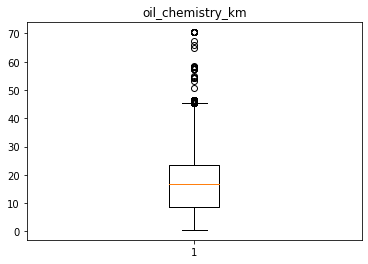

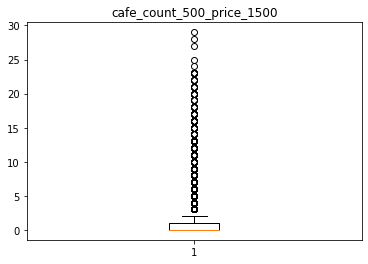

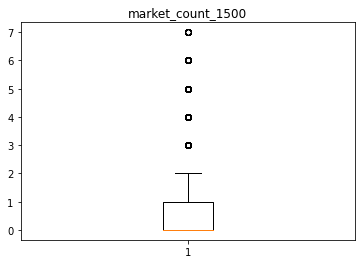

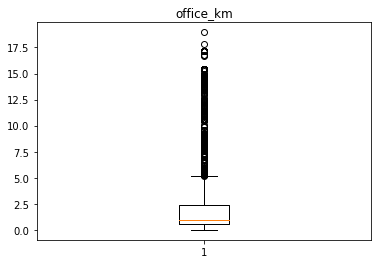

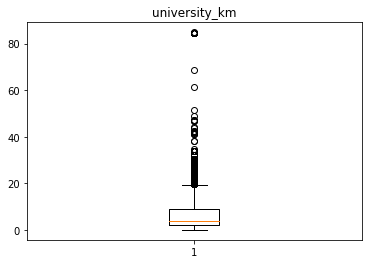

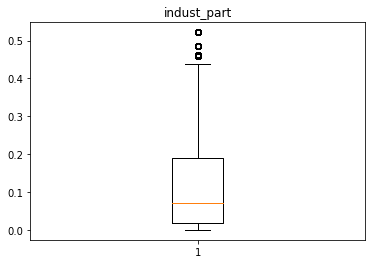

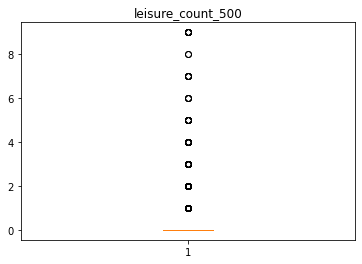

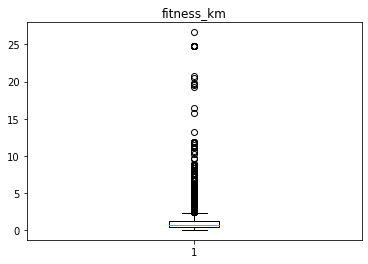

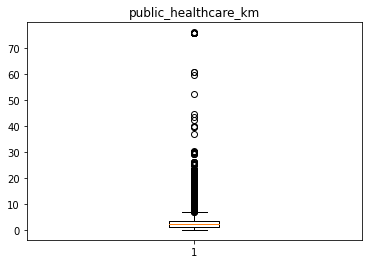

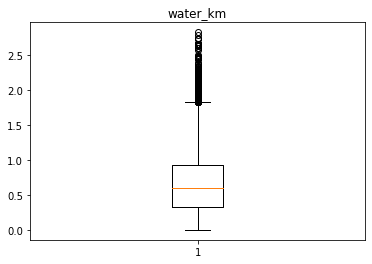

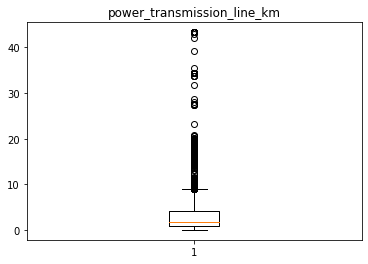

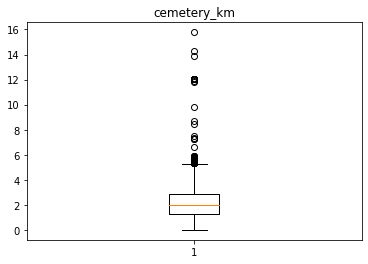

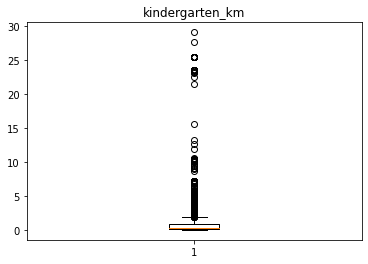

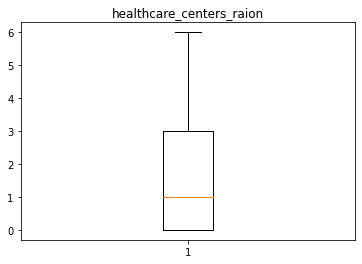

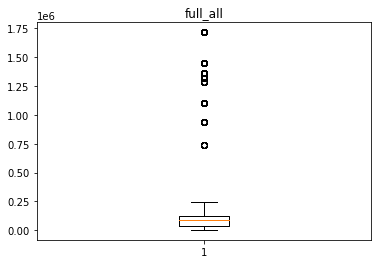

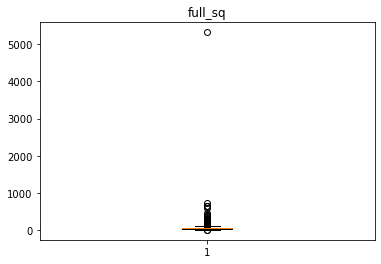

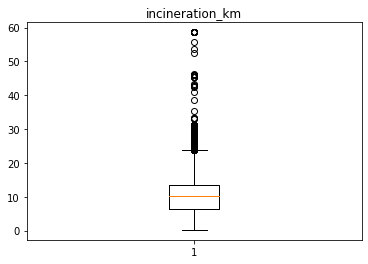

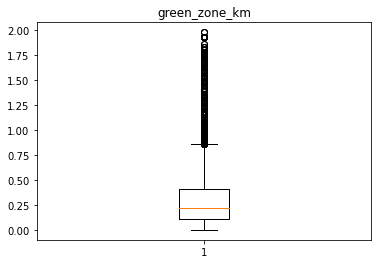

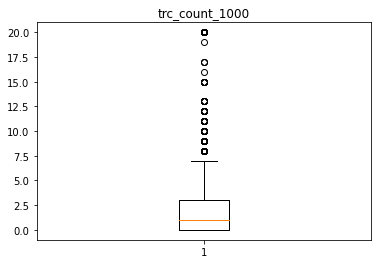

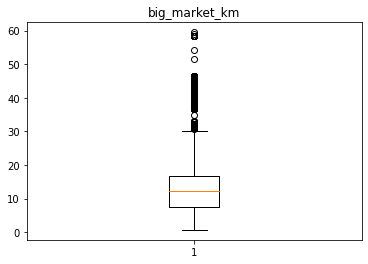

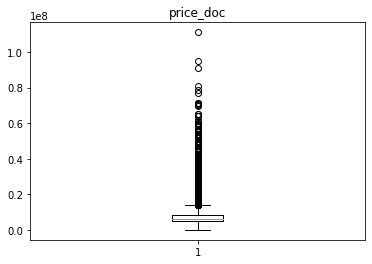

In [16]:
for col in  droped_dataFrame.columns:
    plt.boxplot(droped_dataFrame[col][~np.isnan(droped_dataFrame[col])])
    plt.title(col)
    plt.show()

# Univariate Analysis

# Histogram Plot

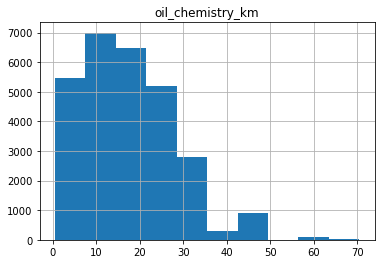

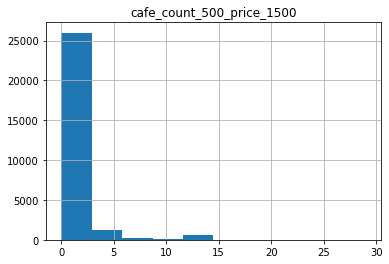

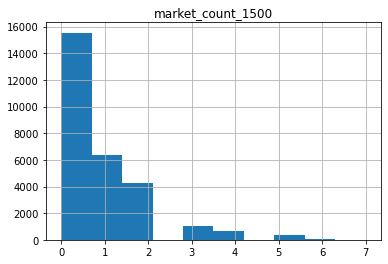

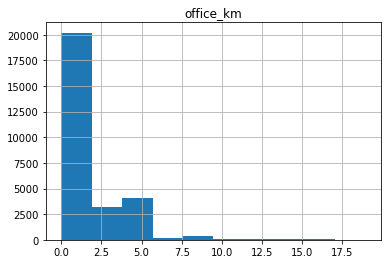

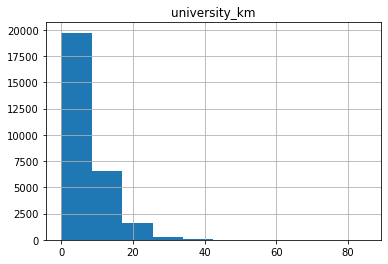

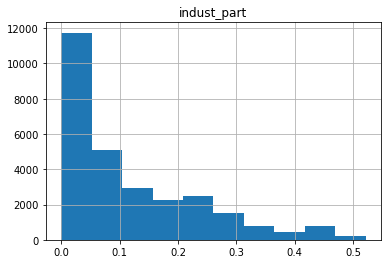

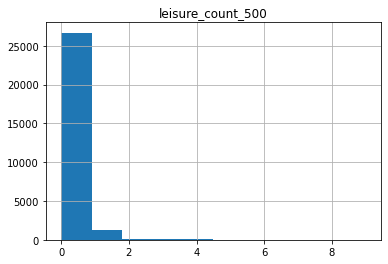

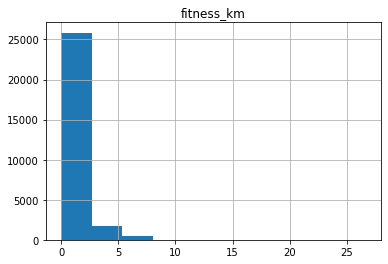

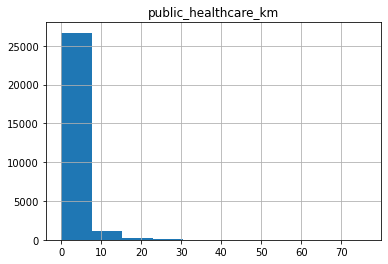

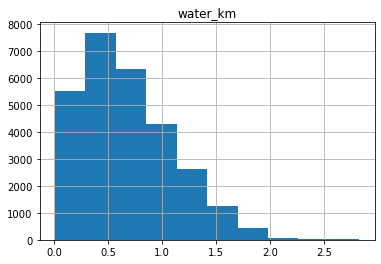

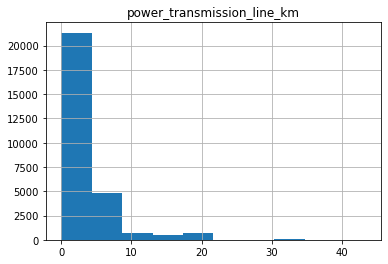

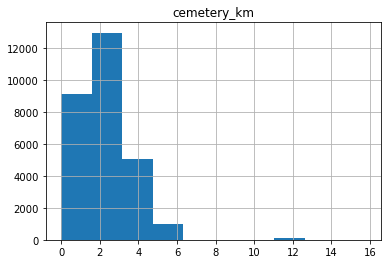

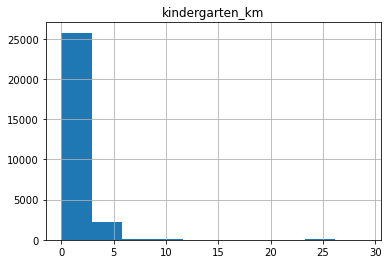

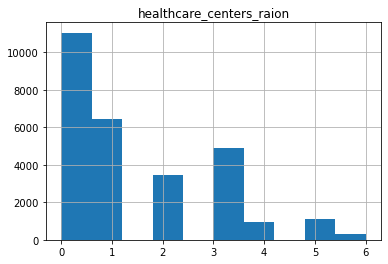

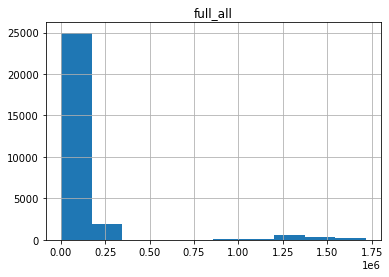

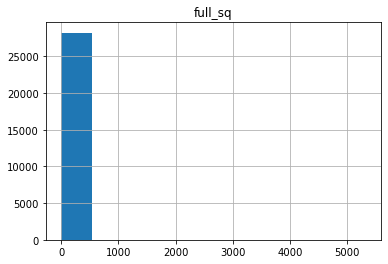

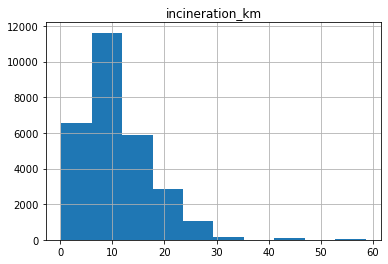

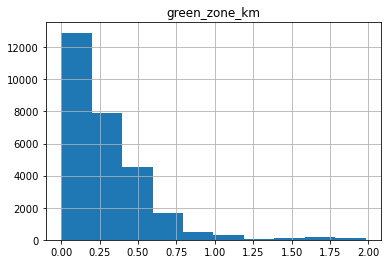

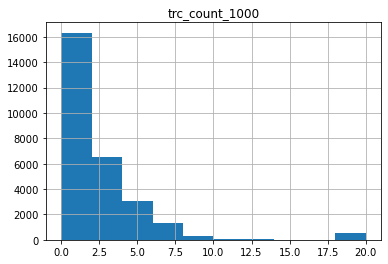

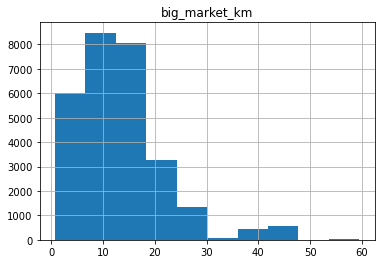

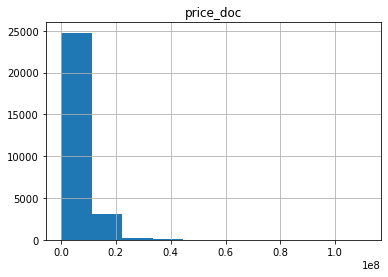

In [17]:
for col in droped_dataFrame.columns:
    droped_dataFrame[col].hist()
    plt.title(col)
    plt.show()

# Bivariate Analysis

# Scatter Plot

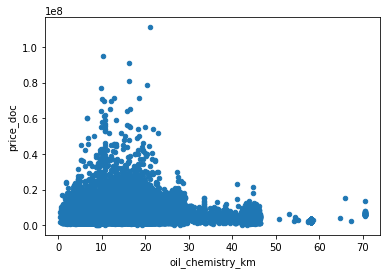

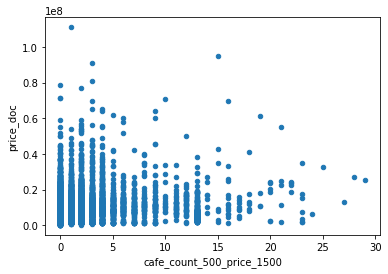

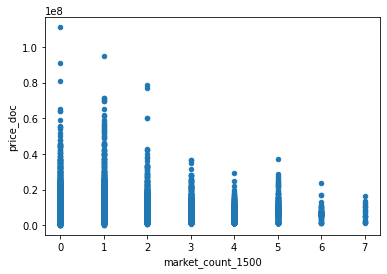

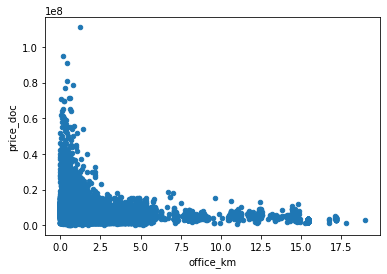

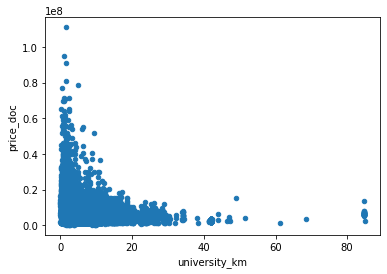

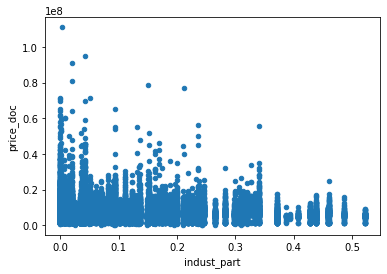

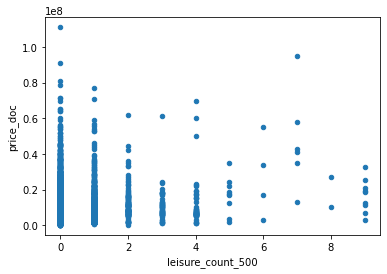

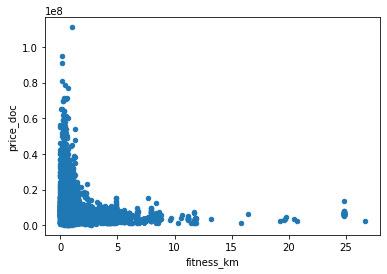

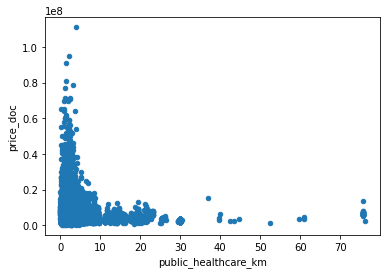

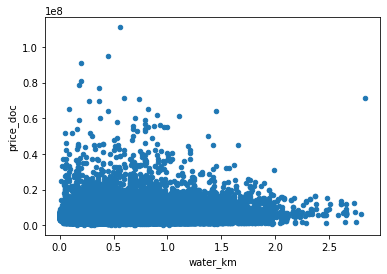

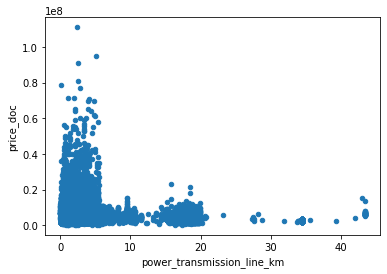

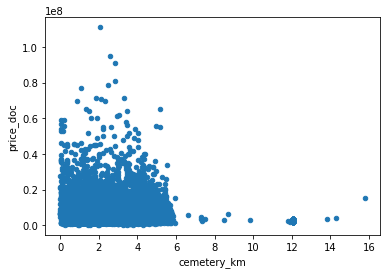

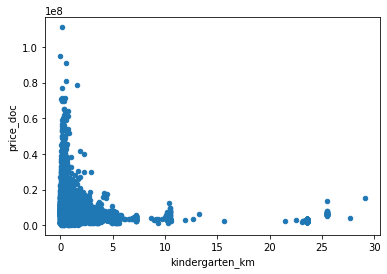

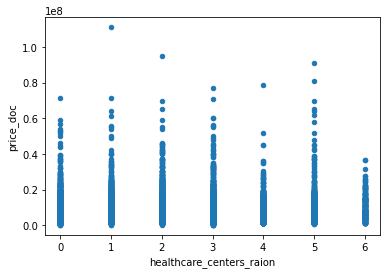

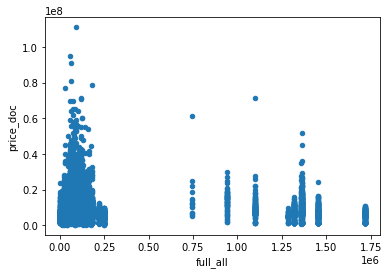

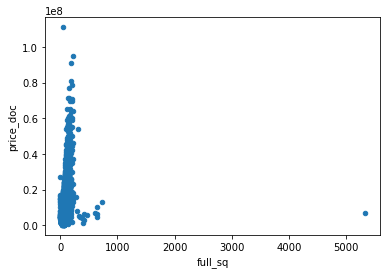

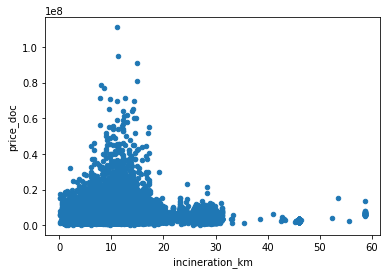

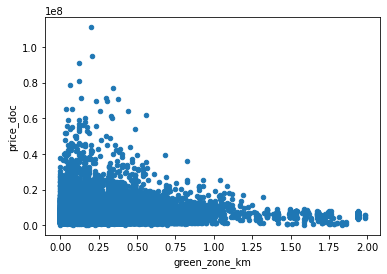

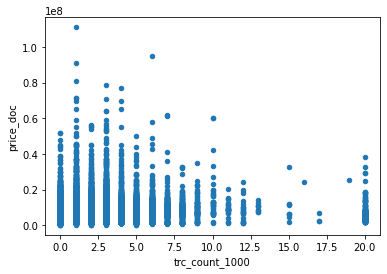

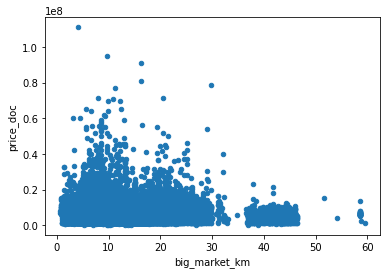

In [18]:
for col in droped_dataFrame.columns[:20]:
    dataFrame.plot(x=col,y="price_doc",kind = 'scatter')
    plt.show()

# Correlation Matrix

In [19]:
droped_dataFrame.corr()

,oil_chemistry_km,cafe_count_500_price_1500,market_count_1500,office_km,university_km,indust_part,leisure_count_500,fitness_km,public_healthcare_km,water_km,...,cemetery_km,kindergarten_km,healthcare_centers_raion,full_all,full_sq,incineration_km,green_zone_km,trc_count_1000,big_market_km,price_doc
oil_chemistry_km,1.000000,-0.197328,-0.332469,0.399019,0.597048,-0.128072,-0.099766,0.457069,0.482006,-0.128191,...,0.090737,0.482997,-0.393736,-0.193254,0.060850,0.689829,-0.081226,-0.206800,0.643678,-0.114626
cafe_count_500_price_1500,-0.197328,1.000000,0.182347,-0.212304,-0.208741,-0.146533,0.270063,-0.158512,-0.089950,0.003039,...,0.157945,-0.062609,0.220557,0.001367,0.044559,-0.010792,-0.058735,0.708262,-0.135305,0.149659
market_count_1500,-0.332469,0.182347,1.000000,-0.266894,-0.315620,0.060543,0.087084,-0.231801,-0.214882,0.016830,...,0.055927,-0.203930,0.357885,-0.008460,-0.029416,-0.145962,-0.034292,0.259251,-0.142600,0.067958
office_km,0.399019,-0.212304,-0.266894,1.000000,0.748127,-0.185104,-0.103598,0.555782,0.667427,-0.093932,...,0.128460,0.510897,-0.392794,-0.092675,0.037348,0.337939,0.110705,-0.313536,0.122288,-0.205735
university_km,0.597048,-0.208741,-0.315620,0.748127,1.000000,-0.202463,-0.118560,0.709837,0.766904,-0.128616,...,0.068769,0.614992,-0.427858,-0.126932,0.047986,0.455935,0.001167,-0.240176,0.313743,-0.207646
indust_part,-0.128072,-0.146533,0.060543,-0.185104,-0.202463,1.000000,0.003278,-0.083343,-0.107870,0.116501,...,0.026031,-0.152206,0.030604,-0.023863,-0.051929,-0.234779,0.170985,-0.103590,0.000141,-0.080177
leisure_count_500,-0.099766,0.270063,0.087084,-0.103598,-0.118560,0.003278,1.000000,-0.073492,-0.073641,0.003289,...,0.000623,-0.060704,0.123047,0.011251,0.020858,0.014274,-0.015516,0.086942,-0.050883,0.158906
fitness_km,0.457069,-0.158512,-0.231801,0.555782,0.709837,-0.083343,-0.073492,1.000000,0.776270,-0.057280,...,0.162228,0.641835,-0.320821,-0.085975,0.038583,0.462393,0.070495,-0.241502,0.255705,-0.179187
public_healthcare_km,0.482006,-0.089950,-0.214882,0.667427,0.766904,-0.107870,-0.073641,0.776270,1.000000,-0.025638,...,0.180270,0.730993,-0.375041,-0.120794,0.056368,0.481607,-0.016128,-0.161906,0.239661,-0.163119
water_km,-0.128191,0.003039,0.016830,-0.093932,-0.128616,0.116501,0.003289,-0.057280,-0.025638,1.000000,...,0.018013,-0.038653,-0.033743,0.035236,-0.017207,-0.100841,0.071461,-0.033280,-0.060530,-0.018711


In [20]:
pd.DataFrame(droped_dataFrame.corr().iloc[:,-1])

,price_doc
oil_chemistry_km,-0.114626
cafe_count_500_price_1500,0.149659
market_count_1500,0.067958
office_km,-0.205735
university_km,-0.207646
indust_part,-0.080177
leisure_count_500,0.158906
fitness_km,-0.179187
public_healthcare_km,-0.163119
water_km,-0.018711


# Heatmap

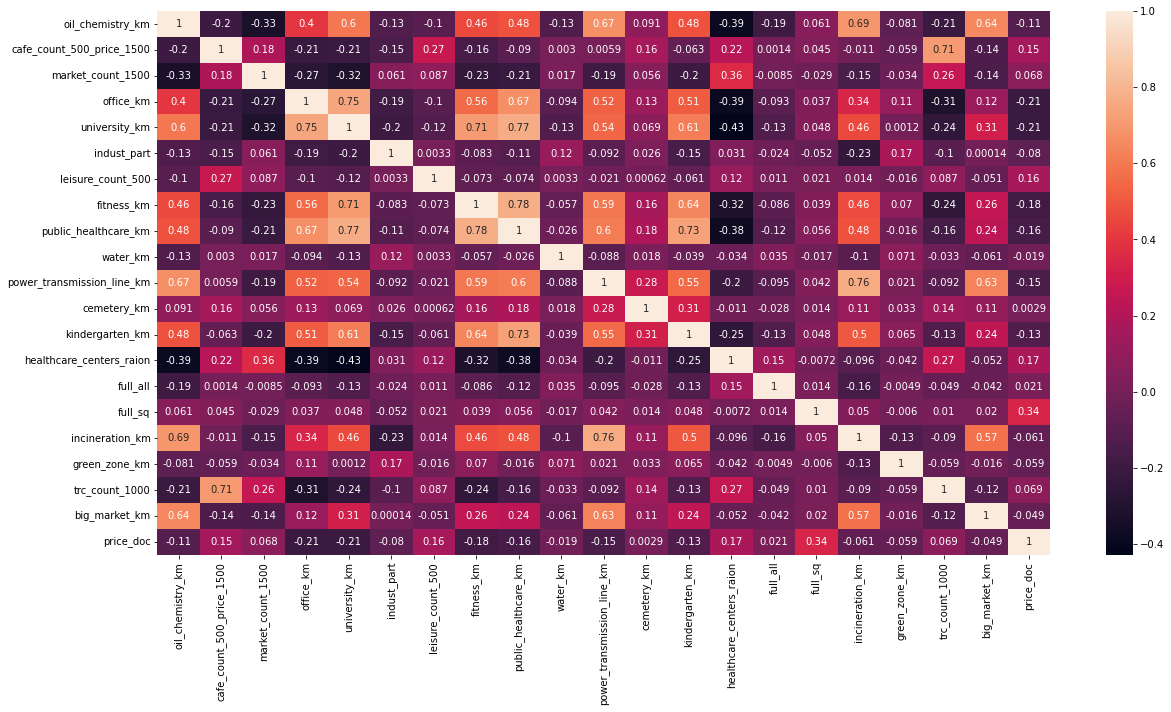

In [21]:
plt.figure(figsize=(20,10))
sns.heatmap(droped_dataFrame.corr(),annot=True)
plt.show()

# Handling Missing Values

In [22]:
droped_dataFrame.isnull().sum()

oil_chemistry_km              0
cafe_count_500_price_1500     0
market_count_1500             0
office_km                     0
university_km                 0
indust_part                   0
leisure_count_500             0
fitness_km                    0
public_healthcare_km          0
water_km                      0
power_transmission_line_km    0
cemetery_km                   0
kindergarten_km               0
healthcare_centers_raion      0
full_all                      0
full_sq                       0
incineration_km               0
green_zone_km                 0
trc_count_1000                0
big_market_km                 0
price_doc                     0
dtype: int64

# Handling Outliers

In [23]:
for col in droped_dataFrame.columns:
    q1 = droped_dataFrame[col].quantile(0.05)
    q3 = droped_dataFrame[col].quantile(0.95)
    droped_dataFrame[col].clip(upper=q3,lower=q1,inplace=True)

C:\Users\kd67152\AppData\Local\Temp\ipykernel_23744\531386290.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  droped_dataFrame[col].clip(upper=q3,lower=q1,inplace=True)


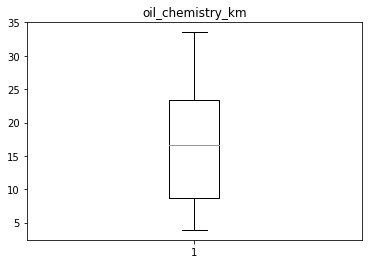

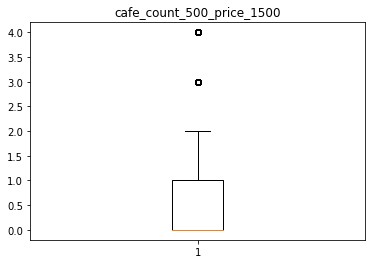

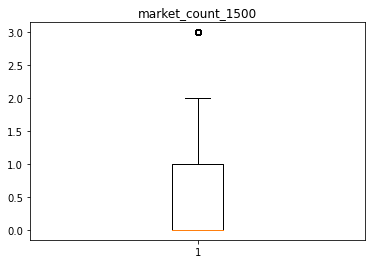

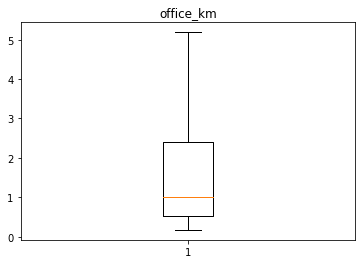

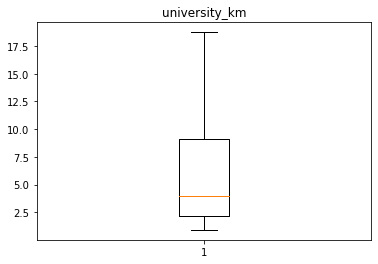

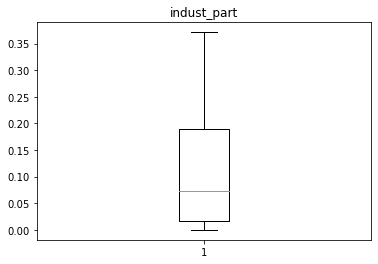

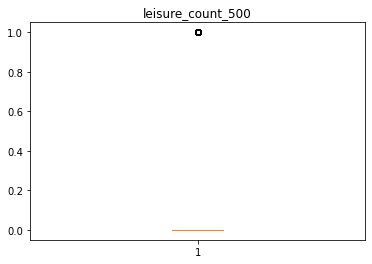

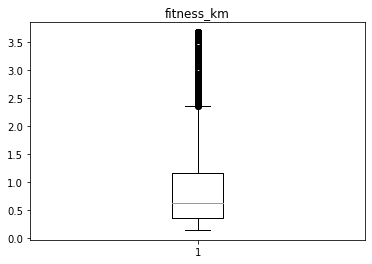

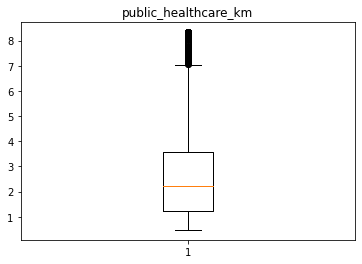

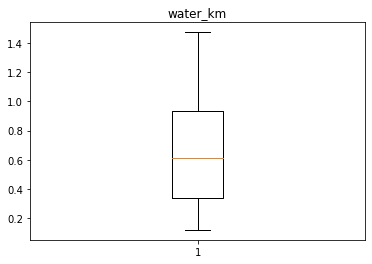

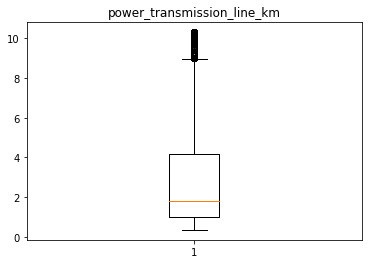

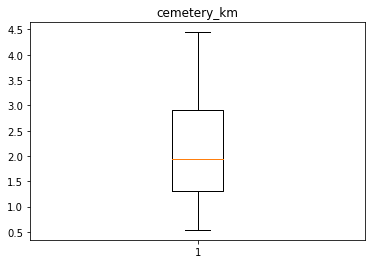

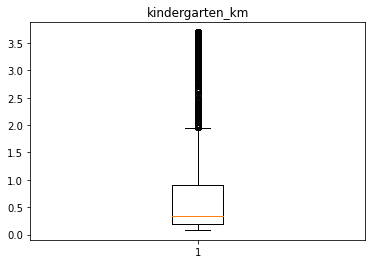

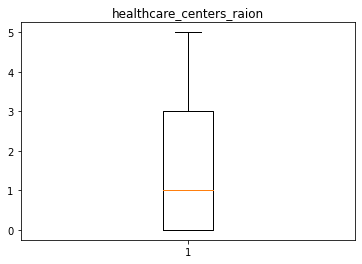

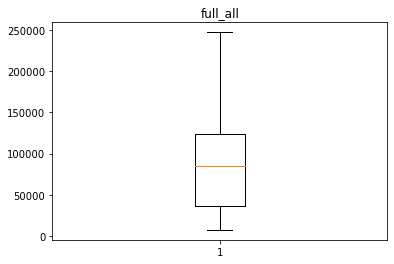

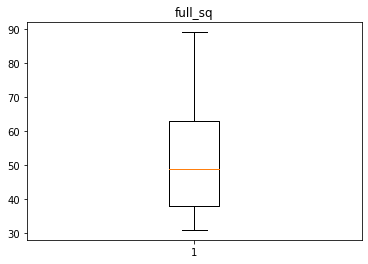

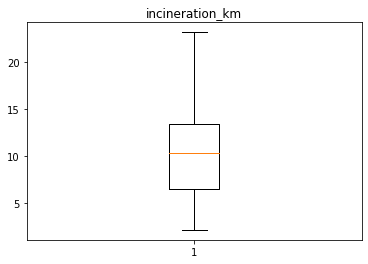

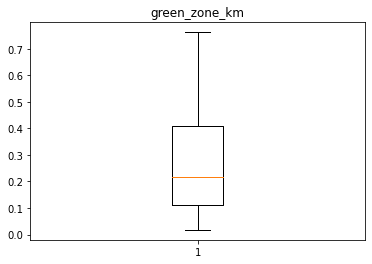

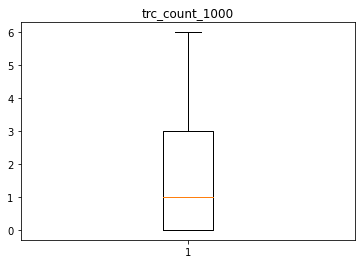

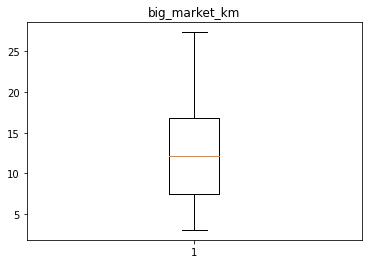

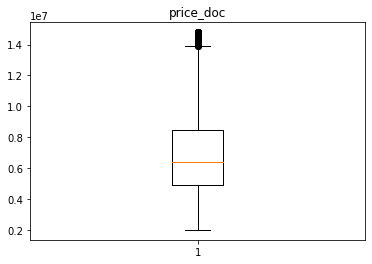

In [24]:
for col in droped_dataFrame.columns:
    plt.boxplot(droped_dataFrame[col])
    plt.title(col)
    plt.show()

# Standardization

In [25]:
for col in droped_dataFrame.columns:
    mean = droped_dataFrame[col].mean()
    std = droped_dataFrame[col].std()
    droped_dataFrame[col] = (droped_dataFrame[col] - mean)/std

C:\Users\kd67152\AppData\Local\Temp\ipykernel_23744\1270106349.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  droped_dataFrame[col] = (droped_dataFrame[col] - mean)/std


In [26]:
droped_dataFrame

,oil_chemistry_km,cafe_count_500_price_1500,market_count_1500,office_km,university_km,indust_part,leisure_count_500,fitness_km,public_healthcare_km,water_km,...,cemetery_km,kindergarten_km,healthcare_centers_raion,full_all,full_sq,incineration_km,green_zone_km,trc_count_1000,big_market_km,price_doc
0,0.149623,-0.550949,0.262028,-0.658895,0.094569,-1.030105,-0.240176,-0.519050,-0.867717,0.807364,...,-0.332670,-0.641716,-0.259256,-0.093713,-0.575492,-1.262803,1.535664,0.668762,-0.291589,-0.337251
1,-0.873827,-0.550949,-0.774047,-0.626557,-0.841289,-0.581465,-0.240176,-0.321332,-0.624533,0.063326,...,2.032998,-0.639643,-0.259256,-0.240305,-1.108640,-0.360792,-1.004338,1.712349,-0.867755,-0.291325
2,-1.239450,0.377526,2.334177,-0.091268,-1.020534,0.042159,-0.240176,-0.251205,-1.107421,-0.517194,...,1.080592,-0.702228,-0.259256,0.139368,-0.575492,0.241338,0.834809,-0.896617,-1.038704,-0.383177
3,1.217730,1.306001,1.298102,-0.472737,0.900640,-0.399392,-0.240176,-0.369948,-0.292855,1.332031,...,-0.141822,-0.607688,-0.259256,-1.054802,2.149489,0.658806,-0.810853,2.234142,2.152180,1.882505
4,-1.156558,3.162951,1.298102,-0.950480,-1.006978,-0.692983,4.163466,-0.806713,-0.796664,0.372038,...,0.682231,-0.538646,1.776440,-0.951026,1.438624,0.224689,-0.193983,0.668762,-0.536472,2.402999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,-0.092542,1.306001,1.298102,-0.366647,-0.767335,1.687521,-0.240176,-0.885876,-0.475116,0.773483,...,-0.217094,-0.654881,-0.259256,-0.460266,-0.516253,-1.528012,-0.651104,0.668762,-0.585788,0.137317
30467,-0.654508,3.162951,0.262028,-0.950480,-1.020534,-1.030031,4.163466,-0.613305,-0.534945,0.986464,...,-0.751336,-0.510050,1.097875,0.357437,1.971773,-0.310485,-0.024949,1.712349,-0.101399,2.402999
30468,1.475992,-0.550949,-0.774047,1.660379,1.283748,-0.966274,-0.240176,0.600724,-0.346438,-0.703722,...,0.067042,0.116862,-0.937822,-1.104517,-0.457015,1.527778,0.711877,-0.896617,0.406826,0.005956
30469,0.311176,2.234476,-0.774047,-0.303221,-0.816289,-0.184978,-0.240176,-0.598159,-0.213389,0.165524,...,0.933314,-0.583908,0.419309,-0.128610,0.668521,-0.150887,-0.235081,-0.896617,-1.441128,2.004974


# Linear Regression

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [28]:
X = droped_dataFrame.drop(["price_doc"],axis=1)
y = droped_dataFrame["price_doc"]

In [29]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

In [30]:
model = LinearRegression().fit(X_train,y_train)

In [31]:
model.score(X_test,y_test)

0.5105332700003595

# Coefficient

     weights                     columns
10 -0.173602  power_transmission_line_km
12 -0.138231             kindergarten_km
4  -0.110731               university_km
5  -0.083666                 indust_part
8  -0.061147        public_healthcare_km
3  -0.061082                   office_km
2  -0.025856           market_count_1500
9  -0.018815                    water_km
14 -0.014097                    full_all
17 -0.012333               green_zone_km
18 -0.009815              trc_count_1000
7   0.013381                  fitness_km
11  0.020289                 cemetery_km
0   0.028614            oil_chemistry_km
6   0.030401           leisure_count_500
16  0.030518             incineration_km
13  0.033471    healthcare_centers_raion
19  0.039311               big_market_km
1   0.069388   cafe_count_500_price_1500
15  0.610322                     full_sq


<BarContainer object of 20 artists>

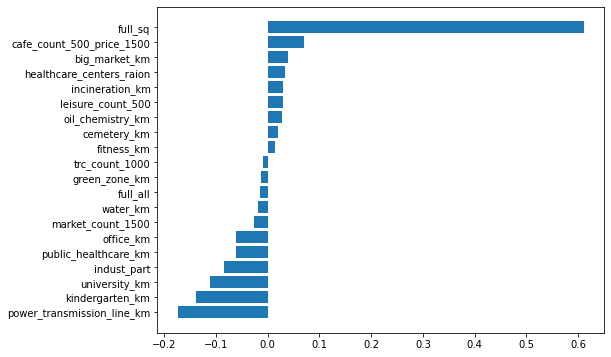

In [32]:
coef=pd.DataFrame(model.coef_,columns=["weights"])
colmn=pd.DataFrame(X_train.columns,columns=["columns"])
importances=pd.concat([coef,colmn],axis=1)
importances.sort_values("weights",ascending=True,inplace=True)
print(importances)
plt.figure(figsize=(8,6))
plt.barh(importances["columns"],width=importances["weights"])

# P-value

In [33]:
from scipy import stats

In [34]:
corr_df = pd.DataFrame(columns=["Feature","corr","p_value"])

for col in droped_dataFrame.columns:
    if col == "price_doc":
        break
    else:
        corr,p_value = stats.pearsonr(droped_dataFrame["price_doc"],droped_dataFrame[col])
        corr_df.loc[len(corr_df)] = [col,corr,p_value]
    
corr_df

,Feature,corr,p_value
0,oil_chemistry_km,-0.130024,1.057771e-106
1,cafe_count_500_price_1500,0.199667,8.890763e-252
2,market_count_1500,0.101879,5.011286e-66
3,office_km,-0.257945,0.000000e+00
4,university_km,-0.257441,0.000000e+00
5,indust_part,-0.065359,4.090917e-28
6,leisure_count_500,0.100369,3.959099e-64
7,fitness_km,-0.264143,0.000000e+00
8,public_healthcare_km,-0.270854,0.000000e+00
9,water_km,-0.023197,9.686913e-05


# Variance Inflation Factor(VIF)

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [36]:
vif_data = pd.DataFrame()
vif_data["feature"] = droped_dataFrame.columns

vif_data["VIF"] = [variance_inflation_factor(droped_dataFrame.values, i)
                          for i in range(len(droped_dataFrame.columns))]

In [37]:
vif_data

,feature,VIF
0,oil_chemistry_km,3.461900
1,cafe_count_500_price_1500,1.481870
2,market_count_1500,1.364706
3,office_km,3.380080
4,university_km,4.663257
5,indust_part,1.305026
6,leisure_count_500,1.090021
7,fitness_km,2.698395
8,public_healthcare_km,3.508910
9,water_km,1.069177


# RandomForestRegressor

In [38]:
rf = RandomForestRegressor(n_estimators=100,n_jobs=-1,max_depth=5,max_features = 'auto',bootstrap = True)
rf.fit(X_train,y_train)
rf.score(X_test,y_test)

0.5469964873539255